## Introuction:
In this notebook, I have implemted Gradient Descent Alogorithm for Linear regression. I have also compared the results with Sci-kit learn LinearRgression model. From this notebook, we can learn how to use gradient descent algorithm to optimize the cost function.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
# read file
df = pd.read_csv('dataset/train.csv')

## Display all columns

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
df = df[['GrLivArea', 'TotalBsmtSF', 'SalePrice']]

In [5]:
df.describe()

,GrLivArea,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1057.429452,180921.195890
std,525.480383,438.705324,79442.502883
min,334.000000,0.000000,34900.000000
25%,1129.500000,795.750000,129975.000000
50%,1464.000000,991.500000,163000.000000
75%,1776.750000,1298.250000,214000.000000
max,5642.000000,6110.000000,755000.000000


In [6]:
df.keys()

Index(['GrLivArea', 'TotalBsmtSF', 'SalePrice'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea      1460 non-null int64
TotalBsmtSF    1460 non-null int64
SalePrice      1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [8]:
df.corr().sort_values('SalePrice')['SalePrice']

TotalBsmtSF    0.613581
GrLivArea      0.708624
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [9]:
df.head()

,GrLivArea,TotalBsmtSF,SalePrice
0,1710,856,208500
1,1262,1262,181500
2,1786,920,223500
3,1717,756,140000
4,2198,1145,250000


In [10]:
# Data Scaling
x_GArea = preprocessing.scale(df['GrLivArea'])
x_BArea = preprocessing.scale(df['TotalBsmtSF'])
y = preprocessing.scale(df['SalePrice'])

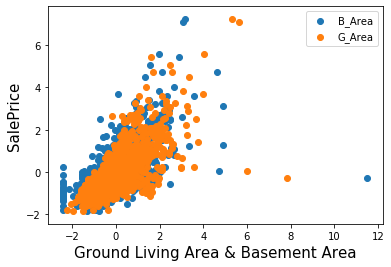

In [11]:
plt.scatter(x_BArea, y, label = 'B_Area')
plt.scatter(x_GArea, y, label = 'G_Area')
plt.legend(fontsize=15)
plt.xlabel('Ground Living Area & Basement Area', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.legend()
plt.show()

In [12]:
# Graident descent parameters
x = np.c_[np.ones(x_GArea.shape[0]),x_GArea, x_BArea] # input parameters with additional column for theta 0
alpha = 0.0001 # learning rate
m = y.size # number of samples
np.random.seed(10)
theta = np.random.rand(3)

## Gradient Descent Cost Funtion Optimization Function

In [13]:
def gradient_descent(x, y, m, theta, aplha):
    cost_list = [] # get all the calulated cost of the loss funtion
    theta_list = [] # get all the theta values
    prediction_list = [] # add all the prdicted values
    run = True
    cost_list.append(100000000) # intially update the some very high cost value
    
    i=0
    while run:
        prediction = np.dot(x, theta) # calculate using regression formula
        prediction_list.append(prediction)
        error = prediction - y # get erro by subtracting actual sles prive from predicted sales price
        cost = 1/(2*m) * np.dot(error.T, error) #  (1/2m) * sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (aplha * (1/m) * np.dot(x.T, error)) # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        
        if cost_list[i]-cost_list[i+1] < 1e-9:   # if cost function value is less than 10^(-9)
            run = False
        
        i += 1
    cost_list.pop(0)
    return prediction_list, cost_list, theta_list

In [14]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)

In [15]:
theta = theta_list[-1]

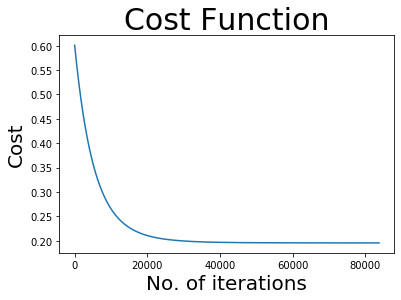

In [16]:
plt.title('Cost Function', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [17]:
# use equestion to get predicted sales price
yp = theta[0] +theta[1]*x[:,1] + theta[2]*x[:,2]

In [18]:
# compare mean squared errors
MSE_equ = ((yp-y)**2).mean()  #Using equation of hyperplane
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent algorithm

print('Mean Square Error with equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error with Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error with equation of hyperplane : 0.391
Mean Square Error with Gradient Descent prediction : 0.391


## Using Sci-kit learn Library

In [19]:
## Using Sklearn Library
from sklearn.linear_model import LinearRegression

In [20]:
ys = df['SalePrice']
xs = np.c_[x_GArea, x_BArea]

# data scaling
xs = preprocessing.scale(xs)
ys = preprocessing.scale(ys)

In [21]:
ys.shape, xs.shape

((1460,), (1460, 2))

In [22]:
# fitting the model
lm = LinearRegression()

lm = lm.fit(xs, ys)

In [23]:
pred = lm.predict(xs)

## Compare the results: Sci-kit learn vs Gradient Descent

In [24]:
intercept = lm.intercept_
Theta_0 = lm.coef_[0]
Theta_1 = lm.coef_[1]

print("Using Sci-kit learn")
print('Intercept : {}'.format(round(intercept,3)))
print('Theta_0 : {}'.format(round(Theta_0,4)))
print('Theta_1 : {}'.format(round(Theta_1,4)))

Using Sci-kit learn
Intercept : 0.0
Theta_0 : 0.5416
Theta_1 : 0.3672


In [25]:
# from Gradient descent
print("Using Gradent Descent Optimization Algorithm")
print('Intercept : {}'.format(round(theta[0],3)))
print('Theta_0 : {}'.format(round(theta[1],4)))
print('Theta_1 : {}'.format(round(theta[2],4)))

Using Gradent Descent Optimization Algorithm
Intercept : 0.0
Theta_0 : 0.5375
Theta_1 : 0.3713


In [26]:
# comparing scores
r2_sk = lm.score(xs,ys)
print('R square from Sci-kit learn: {}'.format(round(r2_sk,4)))

r2 = 1 - (sum((y - prediction_list[-1])**2)) / (sum((y - y.mean())**2))
print('R square with Gradient Descent: {}'.format(round(r2,4)))

R square from Sci-kit learn: 0.6091
R square with Gradient Descent: 0.6091
